<a href="https://colab.research.google.com/github/LorenzoPozzi97/Boston-Housing-Dataset/blob/main/Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston
from scipy import stats
from sklearn.model_selection import train_test_split


In [ ]:
boston_dataset = load_boston()
#print(boston_dataset.keys())
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# Load Data

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

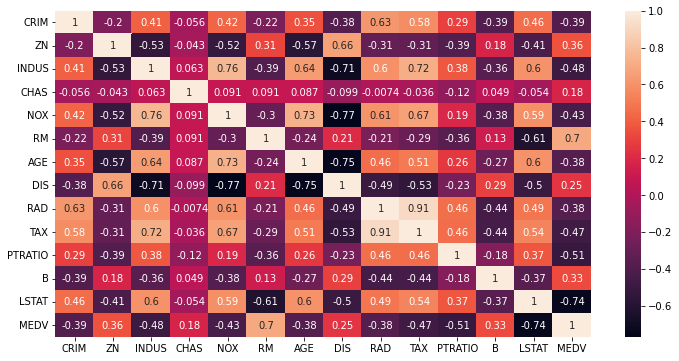

In [ ]:
plt.figure(figsize=(12,6))
corr_val=boston.corr()
sns.heatmap(data=corr_val,annot=True)

boston = boston.drop(['RAD'], axis=1)

In [ ]:
X = boston.drop(['MEDV'], axis=1)
y = boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Linear Regression 

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              708.0
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                   3.43e-233
Time:                        21:39:45   Log-Likelihood:                         -1048.2
No. Observations:                 354   AIC:                                      2120.
Df Residuals:                     342   BIC:                                      2167.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

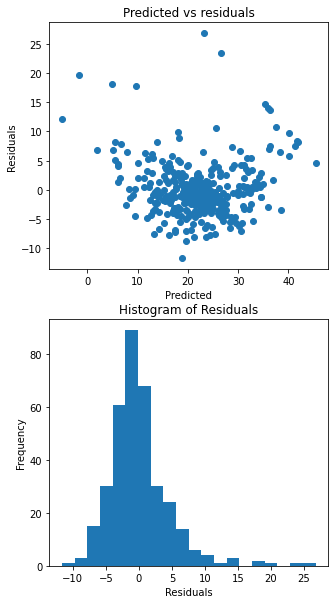

R^2: 0.6949152341227621
Adjusted R^2: 0.6685769809535042
MAE: 3.7413327207060196
MSE: 31.856973304994284
RMSE: 5.644198198592452


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import metrics

linear_regression = sm.OLS(y_train, X_train).fit()
print(linear_regression.summary())

y_pred = linear_regression.predict(X_train)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Checking residuals
fig,axs=plt.subplots(2, figsize=(5, 10))
axs[0].scatter(y_pred,y_train-y_pred)
axs[0].set_title("Predicted vs residuals")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Residuals")
axs[1].hist(y_train-y_pred, bins=20)
axs[1].set_title("Histogram of Residuals")
axs[1].set_xlabel("Residuals")
axs[1].set_ylabel("Frequency")
plt.show()

# Predicting Test data with the model
y_test_pred = linear_regression.predict(X_test)
acc_linreg = metrics.r2_score(y_test, y_test_pred)
rmse_linreg = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',rmse_linreg)


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regression = RandomForestRegressor()
random_forest_regression.fit(X_train, y_train)
y_pred = random_forest_regression.predict(X_train)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
y_test_pred = random_forest_regression.predict(X_test)
acc_rf = metrics.r2_score(y_test, y_test_pred)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',rmse_rf)



R^2: 0.9804024189310434
Adjusted R^2: 0.9797127679843353
MAE: 0.8207966101694916
MSE: 1.4751261864406782
RMSE: 1.2145477291735711
R^2: 0.8363691608399653
Adjusted R^2: 0.8222427574592428
MAE: 2.492947368421053
MSE: 17.086344052631578
RMSE: 4.133563118259062


# XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

xgb_regression = XGBRegressor(objective='reg:squarederror',
                              gamme=0,
                              learning_rate=0.1,
                              max_depth=3,
                              n_estimators=300,
                              reg_lambda= 0,
                              seed=1)

xgb_regression.fit(X_train, 
                   y_train, 
                   early_stopping_rounds=10,
                   eval_set=[(X_test, y_test)], 
                   verbose=False)                            
y_pred = xgb_regression.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

#Predicting Test data with the model
y_test_pred = xgb_regression.predict(X_test)
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',rmse_xgb)

xgb_regression = XGBRegressor(objective='reg:squarederror',
                              gamme=0,
                              learning_rate=0.1,
                              max_depth=3,
                              n_estimators=300,
                              reg_lambda= 0,
                              seed=1)
metric = "neg_mean_squared_error"

k_fold = KFold(n_splits=10, random_state=1, shuffle=True)
results = cross_val_score(xgb_regression, X_train, y_train, cv=k_fold, scoring=metric)
-results.mean()

R^2: 0.9766679302674315
Adjusted R^2: 0.9758468603648192
MAE: 1.0212522458221953
MSE: 1.7562242465163738
RMSE: 1.3252261114679162
R^2: 0.8417276411394968
Adjusted R^2: 0.8280638403745613
MAE: 2.516416049003601
MSE: 16.526811152433584
RMSE: 4.065318087485109


8.906643254039386

In [ ]:
"""from sklearn.model_selection import GridSearchCV

feats = list(zip(xgb_regression.get_booster().feature_names, xgb_regression.feature_importances_))
feats.sort(key=lambda x: x[1])
print(feats)

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [.1, .01, .05], 
    'gamme': [0, .25, 1], 
    'reg_lambda': [0, 1, 10], 
    'n_estimators': range(100, 500, 50)
}
optimal_params = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror',
                                seed=1), 
    param_grid=param_grid, 
    verbose=0, 
    n_jobs=10, 
    cv=3
                              
)
optimal_params.fit(X_train, 
                   y_train, 
                   early_stopping_rounds=10,
                   eval_set=[(X_test, y_test)], 
                   verbose=False)
optimal_params.best_params_"""

"from sklearn.model_selection import GridSearchCV\n\nfeats = list(zip(xgb_regression.get_booster().feature_names, xgb_regression.feature_importances_))\nfeats.sort(key=lambda x: x[1])\nprint(feats)\n\nparam_grid = {\n    'max_depth': [3, 4, 5],\n    'learning_rate': [.1, .01, .05], \n    'gamme': [0, .25, 1], \n    'reg_lambda': [0, 1, 10], \n    'n_estimators': range(100, 500, 50)\n}\noptimal_params = GridSearchCV(\n    estimator=XGBRegressor(objective='reg:squarederror',\n                                seed=1), \n    param_grid=param_grid, \n    verbose=0, \n    n_jobs=10, \n    cv=3\n                              \n)\noptimal_params.fit(X_train, \n                   y_train, \n                   early_stopping_rounds=10,\n                   eval_set=[(X_test, y_test)], \n                   verbose=False)\noptimal_params.best_params_"

# Models Comparison

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100], 
    'RMSE': [rmse_linreg, rmse_rf, rmse_xgb]})
models.sort_values(by='RMSE', ascending=True)

,Model,R-squared Score,RMSE
2,XGBoost,84.172764,4.065318
1,Random Forest,83.636916,4.133563
0,Linear Regression,69.491523,5.644198
